# Actividad 2_9: 

Vamos a hacer un trabajo en grupos. Dividiros en grupos de 2 o 3 personas (organizaros el trabajo para que se pueda hacer en paralelo). Debéis responder a la siguiente pregunta. ¿Existe relación entre la emisión de CO2 que tienen los países y su esperanza de vida? Para ello os sugiero lo siguiente:


1. Podéis buscar los datasets necesarios en el portal Kaggle.
2. Una vez encontrados hay que importar los datos y tratarlos con el objetivo de solucionar la pregunta realizada.
3. Puedes normalizar, pintar gráficas, buscar índices calculados en base a los datos, etc.
4. También puedes utilizar la matriz de correlación. La veremos con detalle más adelante, pero aquí tienes como usarla en Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

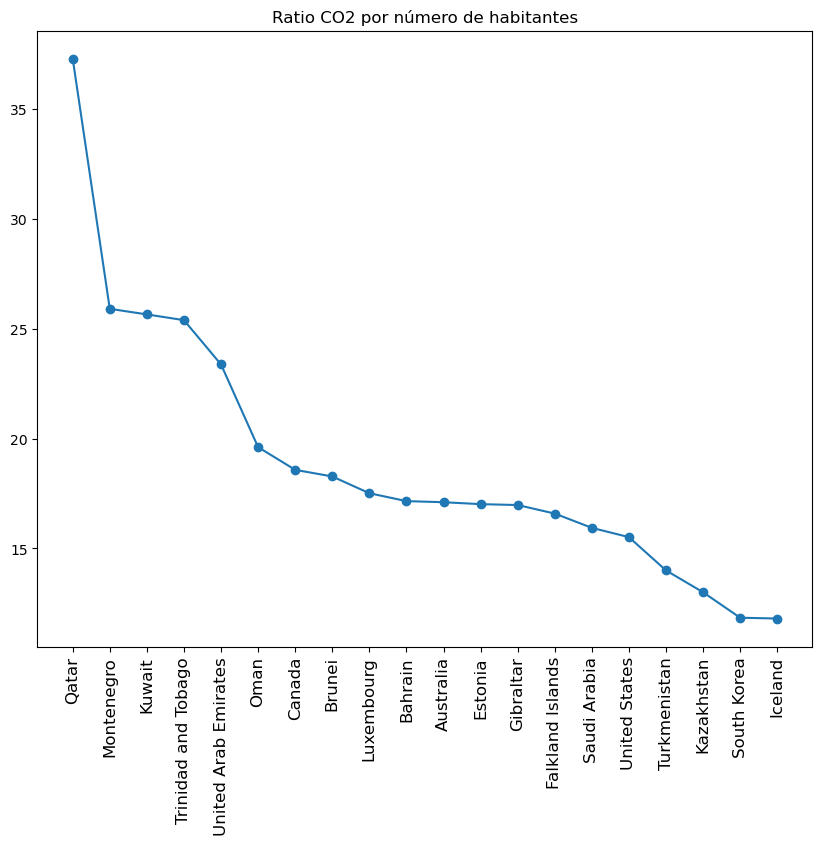

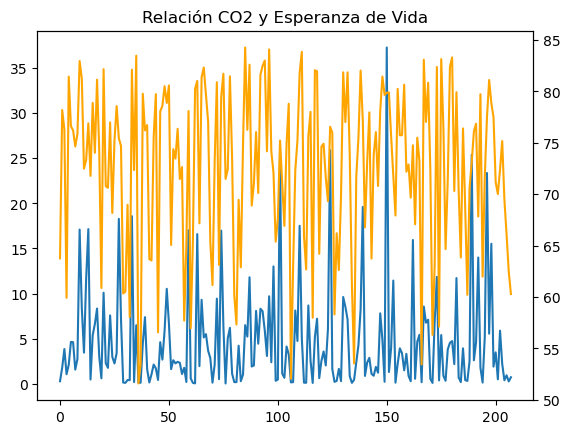

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar CSV
# https://www.kaggle.com/datasets/sansuthi/global-co2-emissions
df_poblacion = pd.read_csv("CO2Emission_LifeExp.csv")

# Mostrar cuales son los paises que mas contaminan
paises = []
emision_por_habitante = []

for row in df_poblacion:
    paises = df_poblacion["Country"]
    emision_por_habitante = df_poblacion["CO2Emissions"] / df_poblacion["Population"]

# Crear dataframe de df_pais_contamina
df_pais_contamina = pd.DataFrame({"Country" : paises, "Emision por habitante" :  emision_por_habitante})

df_filtrado_contamina = df_pais_contamina.sort_values("Emision por habitante", ascending=False).head(20)

# Gráfica CO2 por ratio habitante
plt.figure(figsize=(10, 8))
plt.title("Ratio CO2 por número de habitantes")
plt.plot(df_filtrado_contamina["Country"], df_filtrado_contamina["Emision por habitante"], marker='o',)
plt.xticks(rotation=90, fontsize=12)

# Gráfica relacion CO2 y Esperanza de Vida
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title("Relación CO2 y Esperanza de Vida") # Título

ax1.plot(df_poblacion["Percapita"]) # Eje Y
ax2.plot(df_poblacion["LifeExpectancy"], color="orange") # Eje Y opuesto

plt.show() # Mostrar gráfica


In [4]:
# Relacion entre CO2 y la esperanza de vida.
df_poblacion.corr(numeric_only=True)

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
CO2Emissions,1.000000,-0.135395,0.140748,0.825624,0.092886
YearlyChange,-0.135395,1.000000,-0.220809,-0.038841,-0.175319
Percapita,0.140748,-0.220809,1.000000,-0.000769,0.477303
Population,0.825624,-0.038841,-0.000769,1.000000,-0.011464
LifeExpectancy,0.092886,-0.175319,0.477303,-0.011464,1.000000
